In [36]:
%cd /home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/midterm/ 

/home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/midterm


/home/luzinsan/.cache/pypoetry/virtualenvs/ml-venv-uqlfkjfM-py3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [105]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

import time


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_moons, fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


# LA Bootcamp

In [3]:
def compute_norms(x):
    norm_1 = np.linalg.norm(x, ord=1)
    norm_2 = np.linalg.norm(x, ord=2)
    norm_inf = np.linalg.norm(x, ord=np.inf)
    return norm_2, norm_1, norm_inf

x = np.array([1, -2, 3, -4])
norms = compute_norms(x)
print(f"2-norm: {norms[0]}, 1-norm: {norms[1]}, Infinity norm: {norms[2]}")

2-norm: 5.477225575051661, 1-norm: 10.0, Infinity norm: 4.0


In [4]:
def triangle_inequality(x, y, norm_order=2):
    return np.linalg.norm(x + y, norm_order) <= np.linalg.norm(x, norm_order) + np.linalg.norm(y, norm_order)

x = np.array([1, -2, 3])
y = np.array([4, -1, 0])
print("Triangle inequality holds:", triangle_inequality(x, y))

Triangle inequality holds: True


In [8]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Matrix operations
print("Matrix A:\n", A)
print("Matrix B:\n", B)

# Matrix multiplication
print("A * B:\n", A @ B)
# Transpose
print("A Transpose:\n", A.T)
# Inverse
print("A Inverse:\n", np.linalg.inv(A))

Matrix A:
 [[1 2]
 [3 4]]
Matrix B:
 [[5 6]
 [7 8]]
A * B:
 [[19 22]
 [43 50]]
A Transpose:
 [[1 3]
 [2 4]]
A Inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]


In [9]:
def matrix_properties(A):
    det = np.linalg.det(A)
    rank = np.linalg.matrix_rank(A)
    return det, rank

A = np.array([[2, 3], [1, 4]])
det, rank = matrix_properties(A)
print(f"Determinant: {det}, Rank: {rank}")

Determinant: 5.000000000000001, Rank: 2


In [25]:
def scalar_projection(a, b):
    return (a @ b) / np.linalg.norm(a)

def vector_projection(a, b):
    projection = ((a @ b) / np.linalg.norm(a)**2) * a
    # projection = ((a @ b) / (a @ a)) * a
    return projection

# Example usage
a = np.array([1, 2])
b = np.array([3, 4])
print("Vector projection of b onto a:", vector_projection(a, b))
print("Scalar projection of b onto a:", scalar_projection(a, b))

Vector projection of b onto a: [2.2 4.4]
Scalar projection of b onto a: 4.919349550499537


In [26]:
def is_orthogonal(a, b):
    return np.isclose(np.dot(a, b), 0)

a = np.array([1, 2])
b = np.array([-2, 1])
print("Are a and b orthogonal?", is_orthogonal(a, b))

Are a and b orthogonal? True


# SVD

In [64]:
def reconstruct_matrix(U, S, Vt):
    return U @ np.diag(S) @ Vt

def reconstruct_image(U, S, Vt, k):
    return U[:, :k] @ np.diag(S)[:k, :k] @ Vt[:k, :]

def reconstruction_error(A, with_A):
    return np.linalg.norm(A - with_A)

In [65]:
A = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12], 
              [13, 14, 15, 16]])
U, S, Vt = svd(A)
print("Matrix A:\n", A)
print("\nU Matrix:\n", U)
print("\nSingular Values:\n", S)
print("\nV^T Matrix:\n", Vt)



A_reconstructed = reconstruct_matrix(U, S, Vt)
print("Reconstructed Matrix A:\n", A_reconstructed)
reconstruction_error_A = reconstruction_error(A, A_reconstructed)
print(f"Reconstruction Error: {reconstruction_error_A}")

Matrix A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

U Matrix:
 [[-0.13472212 -0.82574206  0.53800026 -0.10274101]
 [-0.3407577  -0.4288172  -0.64075506  0.53798973]
 [-0.54679327 -0.03189234 -0.33249068 -0.76775644]
 [-0.75282884  0.36503251  0.43524547  0.33250772]]

Singular Values:
 [3.86226568e+01 2.07132307e+00 2.69766687e-16 3.52519360e-17]

V^T Matrix:
 [[-0.4284124  -0.47437252 -0.52033264 -0.56629275]
 [ 0.71865348  0.27380781 -0.17103786 -0.61588352]
 [ 0.52619521 -0.58826369 -0.40205823  0.46412672]
 [-0.15204804  0.59493346 -0.73372282  0.29083739]]
Reconstructed Matrix A:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
Reconstruction Error: 9.945640348601413e-15


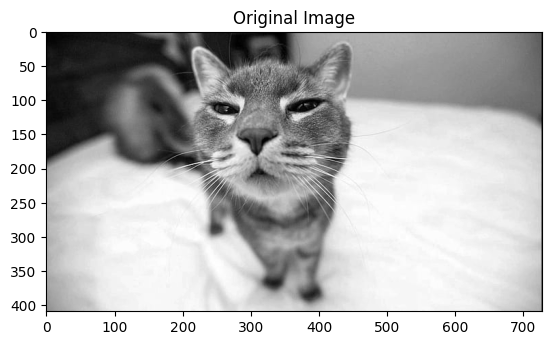

Image size: 298480 pixils
Original Size: 698494, Compressed Size for k=10: 11390, Size Ration= 0.0163


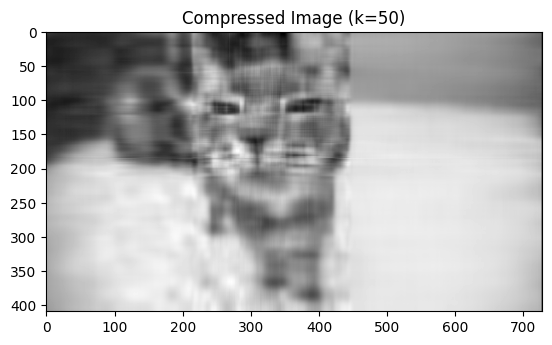

Reconstruction Error: 31.38295317175367


In [67]:
# Example with k = 50 for image
image = io.imread('../week2/pretty_cat.jpg', as_gray=True)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()
print(f'Image size: {np.prod(image.shape)} pixils')


U, S, Vt = svd(image)
k = 10
original_size = U.size + S.size + Vt.size
compressed_size_k = U[:, :k].size + S[:k].size + Vt[:k, :].size
print(f"Original Size: {original_size}, Compressed Size for k={k}: {compressed_size_k}, Size Ration={compressed_size_k/original_size: 0.3}")

compressed_image = reconstruct_image(U, S, Vt, k)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (k=50)')
plt.show()
reconstruction_error_image = reconstruction_error(image, compressed_image)
print(f"Reconstruction Error: {reconstruction_error_image}")


# Linear Regression

**Linear Regression** using the **Normal Equation** (**Least squared method**): $ \theta = (X^T X)^{-1} X^T$

**Linear Regression** using the **SVD**: $ \theta = V \frac{1}{\Sigma} U^T$

In [73]:
def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y


def svd_least_squares(X, y):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    theta_svd = Vt.T @ np.diag(1/S) @ U.T @ y
    return theta_svd

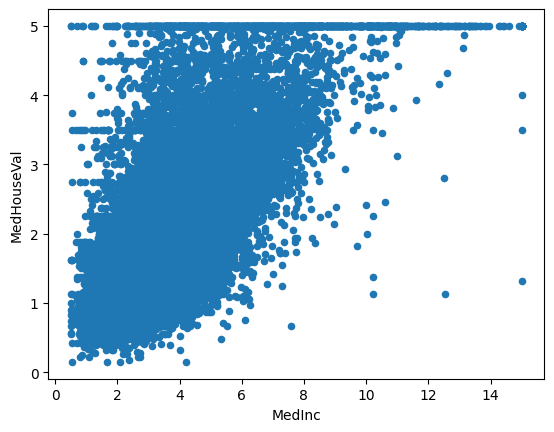

In [68]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# Load the dataset
cali = fetch_california_housing(as_frame=True)
df = cali.frame

# Visualize data
df.plot(kind='scatter', x='MedInc', y='MedHouseVal')
plt.show()

In [70]:
# Prepare the data (add intercept term)
X = np.c_[np.ones(df.shape[0]), df['MedInc'].values]
y = df['MedHouseVal'].values

# Calculate theta
theta = least_squares(X, y)
print("Theta:", theta)

Theta: [0.45085577 0.41793849]


In [75]:
# Calculate theta using SVD
theta_svd = svd_least_squares(X, y)
print("Theta (SVD):", theta_svd)

Theta (SVD): [0.45085577 0.41793849]


In [77]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
print("Scikit-learn coefficients:", model.coef_)

Scikit-learn coefficients: [0.45085577 0.41793849]


In [79]:
# Generate large synthetic dataset
X_large, y_large, w_true = datasets.make_regression(
    n_samples=100000, # number of points
    n_features=1500, # number of features
    n_informative=1000, # number of informative features
    noise=3, # std of y
    bias=0, # bias for the model
    coef=True, # returning true coeffs
    random_state=2024
)

# Time the normal equation solution
start_time = time.time()
theta_large = least_squares(X_large, y_large)
print("Time taken by normal equation:", time.time() - start_time)

Time taken by normal equation: 5.06623649597168


In [86]:
def mini_batch_gradient_descent(X, y, alpha=0.01, iterations=1000, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(iterations):
        idx = np.random.choice(m, batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        # Todo
        gradient = (1 / batch_size) * (X_batch.T @ (X_batch @ theta - y_batch))
        #gradient = np.gradient(y_batch, X_batch)
        theta -= alpha * gradient
        alpha *= 0.999
    return theta

# Run Mini-Batch Gradient Descent
start_time = time.time()
theta_mbgd = mini_batch_gradient_descent(X_large, y_large, alpha=0.06, iterations=2500, batch_size=64)
print("Time taken by Gradient Descent:", time.time() - start_time)
print("Difference from true values:", np.mean(abs(theta_mbgd-w_true)))

y_pred_large = X_large @ theta_mbgd
print("R2 score:", r2_score(y_pred_large, y_large))

Time taken by Gradient Descent: 8.706827163696289
Difference from true values: 0.01813483657971107
R2 score: 0.9999972674883657


In [85]:
def ridge_regression(X, y, lambda_):
   m, n = X.shape
   I = np.eye(n)
   return np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y

# Apply Ridge Regression
theta_ridge = ridge_regression(X_large, y_large, lambda_=0.1)
print("Theta (Ridge):", theta_ridge)

Theta (Ridge): [ 1.78346688e+01  3.91461394e-03  4.57692732e+00 ... -1.53678173e-02
  3.20060312e+01  1.40253494e-03]


# PCA

In [88]:
# Center of data (mean)
xC = np.array([2, 1])
# Principal axes
sig = np.array([2, 0.5])
theta = np.pi / 3  # Rotation angle

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# Number of points
nPoints = 10000

In [89]:
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + xC[:, np.newaxis]  # Broadcasting


In [91]:
# Compute mean
Xavg = np.mean(X, axis=1)
B = X - Xavg[:, np.newaxis]  # Mean-subtracted Data

# PCA via SVD
U, S, Vt = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)

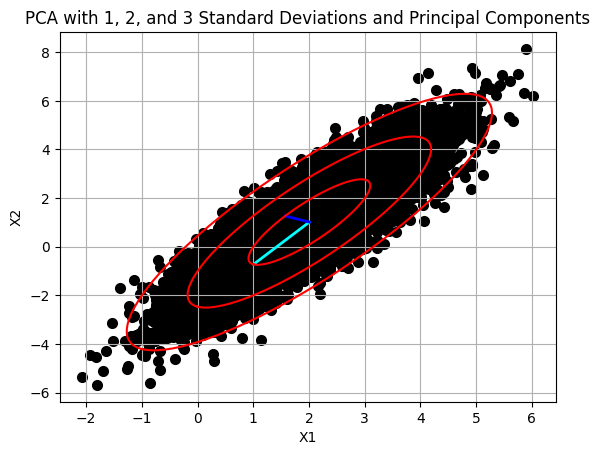

In [93]:
# Plot data again
plt.scatter(X[0, :], X[1, :], color='k', linewidth=2)
V = Vt.T
# Plot the principal components in blue and cyan
for i in range(2):
    start = Xavg
    end = Xavg + U[i, :] * S[i]  # Scale the principal component by its singular value
    color = 'cyan' if i == 0 else 'blue'
    plt.plot([start[0], end[0]], [start[1], end[1]], color=color, linewidth=2)

# 1-standard deviation confidence interval
theta = np.linspace(0, 2 * np.pi, 100)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

# Plot the confidence intervals
plt.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], 'r-')  # 1 std
plt.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + 2 * Xstd[1, :], 'r-')  # 2 std
plt.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + 3 * Xstd[1, :], 'r-')  # 3 std

# Show plot
plt.title('PCA with 1, 2, and 3 Standard Deviations and Principal Components')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.savefig('noisy_gaussian_res.png', dpi=300)
plt.show()


In [97]:
# Compute mean
Xavg = np.mean(X, axis=0)
B = X - Xavg[np.newaxis,:]  # Mean-subtracted Data
[m, n] = B.shape

# Perform SVD
U, S, Vt = np.linalg.svd(B/np.sqrt(m), full_matrices=False)
V = Vt.T
print(V.shape)


# Keep first k=3 components
Vk = V[:,:3]
print(Vk.shape)


# Compute the Loadings
X_proj = B@Vk
print(X_proj.shape)

(10000, 2)
(10000, 2)
(2, 2)


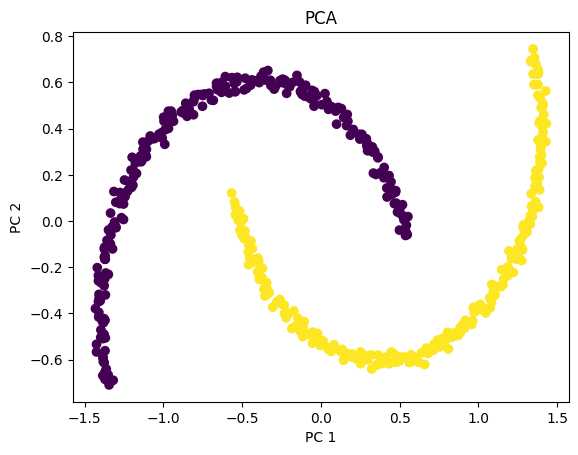

In [99]:
# Non-linear PCA
X, y = datasets.make_moons(n_samples=500, noise=0.02, random_state=417)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)


plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# Logistic Regression

## Logistic Regression Formula:

- Logistic Regression predicts a probability $( P(y=1|X) )$ using the sigmoid function:
$$
  [
  h_{\theta}(X) = \frac{1}{1 + e^{-\theta^T X}}
  ]
$$
- The **loss function** for Logistic Regression (binary cross-entropy loss) is:
$$
  [
  J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
  ]
$$

In [101]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        theta -= (alpha / m) * (X.T @ (sigmoid(X @ theta) - y))
        costs.append(compute_cost(X, y, theta))
    return theta, costs

# Predict function
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5


In [102]:
# Generate some binary classification data
np.random.seed(42)
X = np.random.randn(100, 2)
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
y = (X[:, 1] + X[:, 2] > 0).astype(int).reshape(-1, 1)  # Linearly separable labels

# Initialize theta
theta_init = np.zeros((X.shape[1], 1))

# Train Logistic Regression with Gradient Descent
theta, costs = gradient_descent(X, y, theta_init, alpha=0.01, iterations=10000)
print("Learned parameters (theta):", theta.ravel())


# Accuracy of predictions
preds = predict(X, theta)
accuracy = np.mean(preds == y) * 100
print(f"Accuracy: {accuracy:.2f}%")


Learned parameters (theta): [-0.17466043  3.73161667  3.74056214]
Accuracy: 99.00%


In [104]:
# Using scikit-learn's Logistic Regression
model = LogisticRegression(fit_intercept=True, solver='lbfgs', penalty=None)
model.fit(X[:, 1:], y.ravel())  # Omit the intercept column since fit_intercept is True

# Predict and compare results
y_pred = model.predict(X[:, 1:])
accuracy_sklearn = accuracy_score(y, y_pred) * 100
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}%")

# Compare learned parameters
print("Learned parameters (scikit-learn):", model.intercept_, model.coef_)

Accuracy (scikit-learn): 100.00%
Learned parameters (scikit-learn): [-0.84650206] [[118.52469511 112.51512888]]


# K-means

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Reduce dimensions with PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [106]:
k = 10
# k-means with random initialization
kmeans_random = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
%time kmeans_random.fit(X_pca)

CPU times: user 65.6 ms, sys: 6.76 ms, total: 72.3 ms
Wall time: 89.1 ms


KMeans(init='random', n_clusters=10, n_init=10, random_state=42)

In [ ]:
# k-means with k-means++ initialization
kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
%time kmeans_pp.fit(X_pca)

In [ ]:
print(f'Inertia with random initialization: {kmeans_random.inertia_}')
print(f'Inertia with k-means++ initialization: {kmeans_pp.inertia_}')

In [ ]:
# Silhouette Score for random initialization
silhouette_random = silhouette_score(X_pca, kmeans_random.labels_)
print(f'Silhouette Score with random initialization: {silhouette_random}')

# Silhouette Score for k-means++ initialization
silhouette_pp = silhouette_score(X_pca, kmeans_pp.labels_)
print(f'Silhouette Score with k-means++ initialization: {silhouette_pp}')

In [ ]:
print(f'Iterations with random initialization: {kmeans_random.n_iter_}')
print(f'Iterations with k-means++ initialization: {kmeans_pp.n_iter_}')


# Midterm

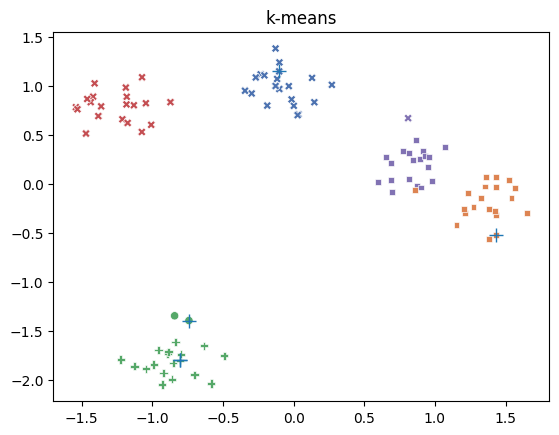

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random


def most_common(lst):
    """
    Return the most frequently occuring element in a list.
    """
    return max(set(lst), key=lst.count)


def euclidean(point, data):
    """
    Return euclidean distances between a point & a dataset
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))


class KMeans:

    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):

        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]  # Indexed @ zero to get val, not array of val
            self.centroids += [X_train[new_centroid_idx]]

        # This method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = self.centroids
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs


# Create a dataset of 2D distributions
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.title("k-means")
plt.show()